## Import

In [5]:
import optuna
import pandas as pd

from hp_pred.test_model import Test_Model

optuna.logging.set_verbosity(optuna.logging.WARNING)

## Loading data

In [10]:
train = pd.read_csv('./data/features_extracted/train.csv')
test = pd.read_csv('./data/features_extracted/test.csv')

FEATURE_NAME = list(test.columns.difference(['label','cv_split']))

## Results

Model XGBoost_PR loaded
Number of points in test data: 228
Prevalence of positive class: 40.35%
---
Model XGBoost_ROC loaded
Number of points in test data: 228
Prevalence of positive class: 40.35%
---
Model Reg_log loaded
Number of points in test data: 228
Prevalence of positive class: 40.35%
---
Initialized 3 models for visualization
Generating predictions...
Generating predictions for XGBoost_PR...
Generating predictions for XGBoost_ROC...
Generating predictions for Reg_log...
Plotting ROC curves...


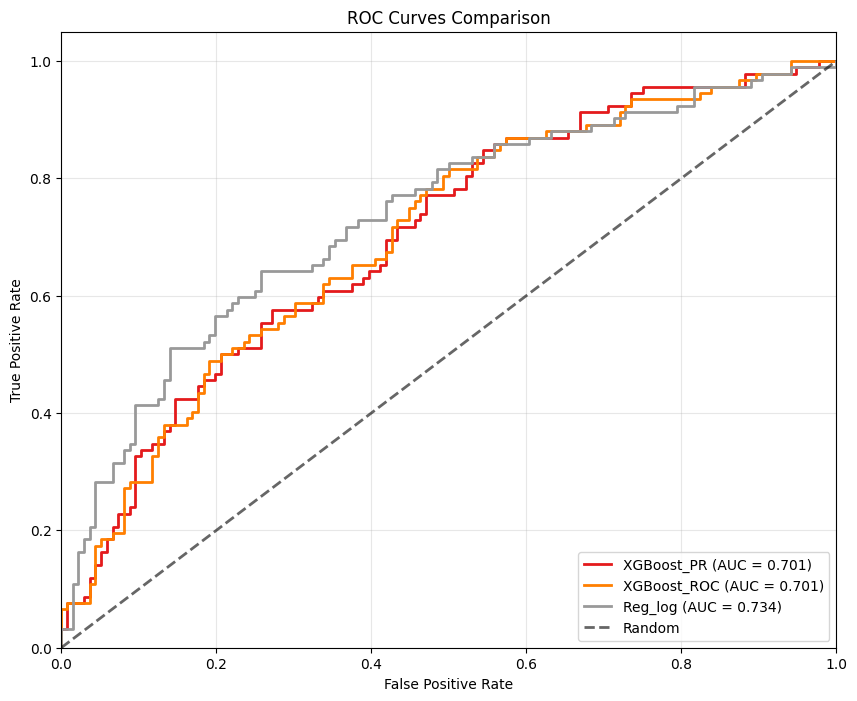

Plotting Precision-Recall curves...


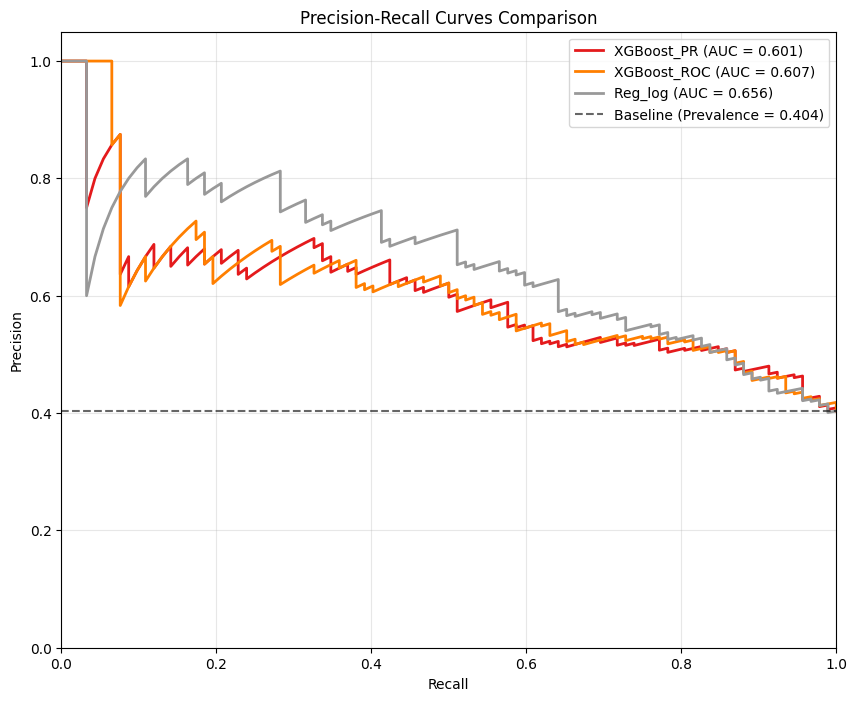

Computing and plotting SHAP values...
Computing SHAP values for XGBoost_PR...


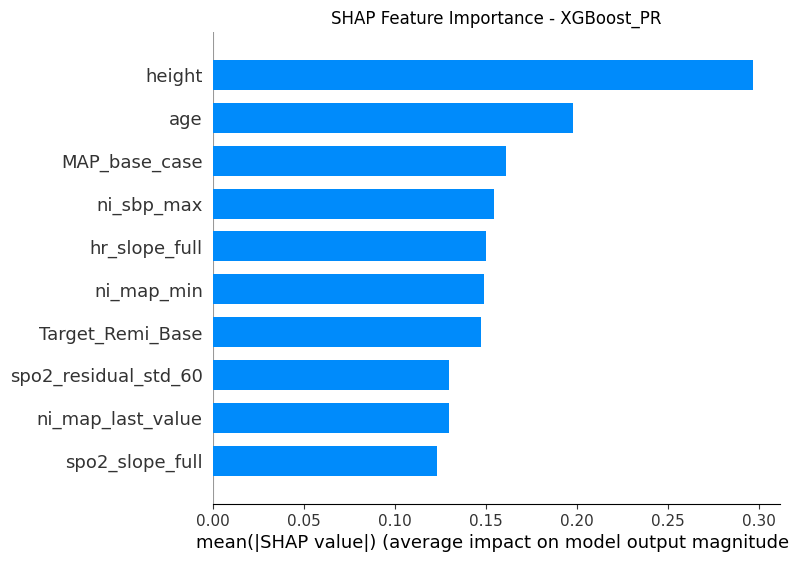

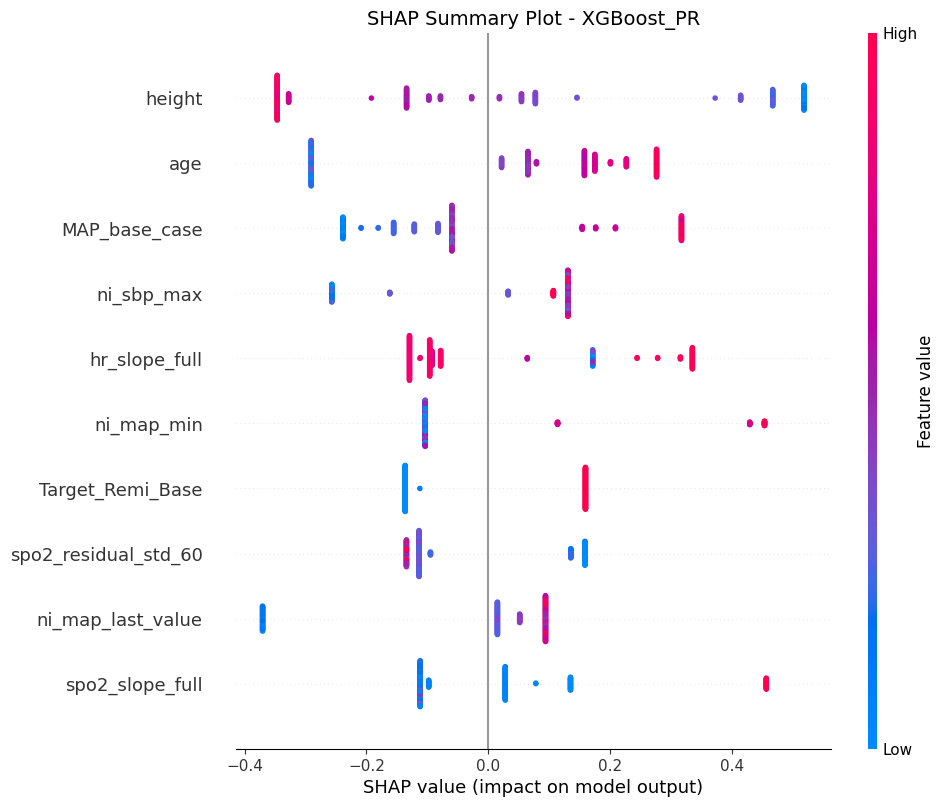

Computing SHAP values for XGBoost_ROC...


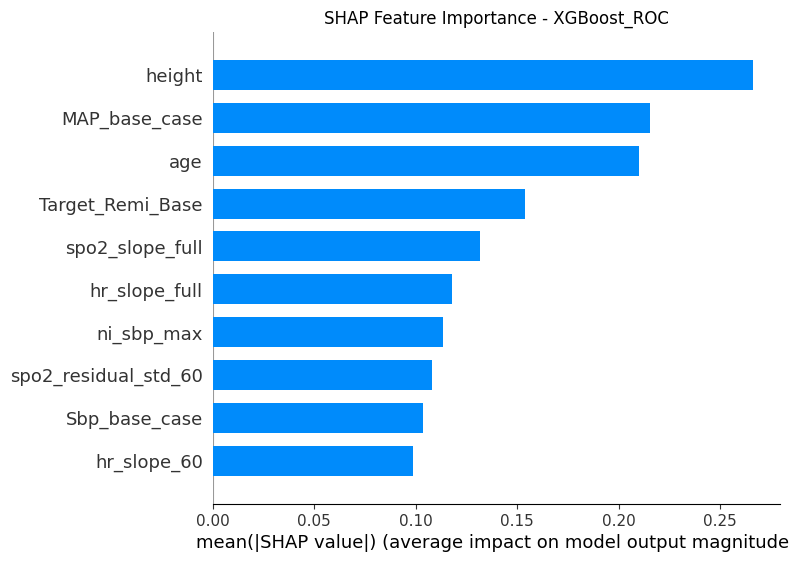

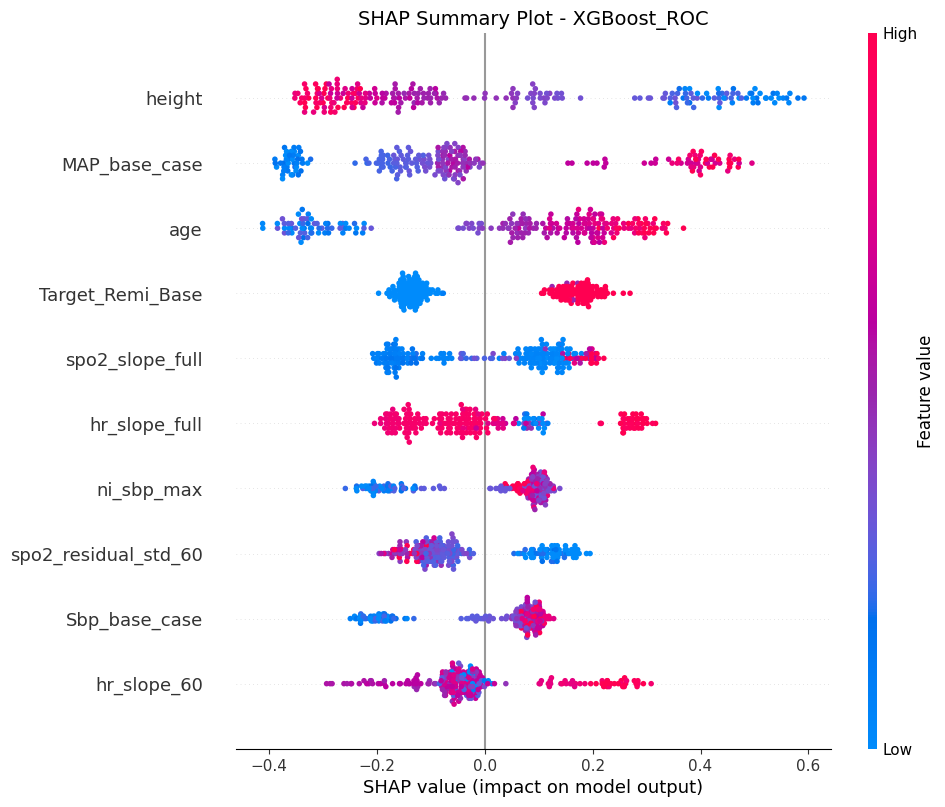

Computing SHAP values for Reg_log...


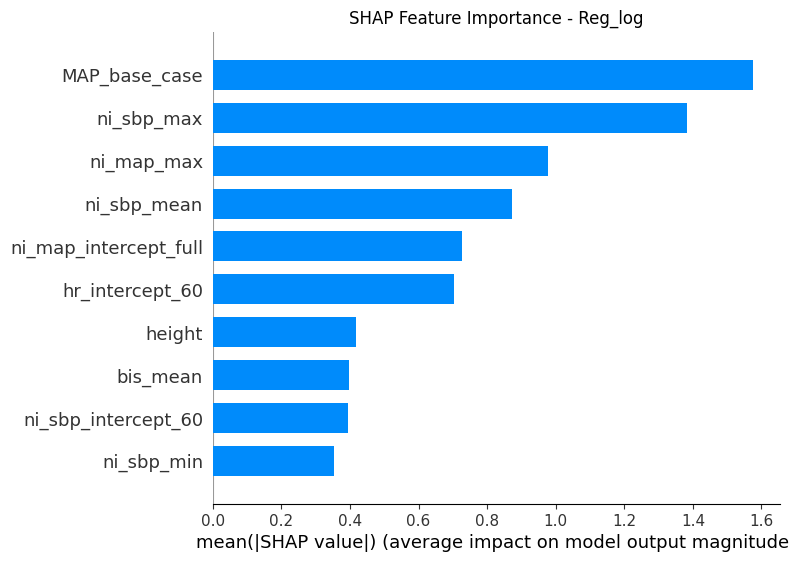

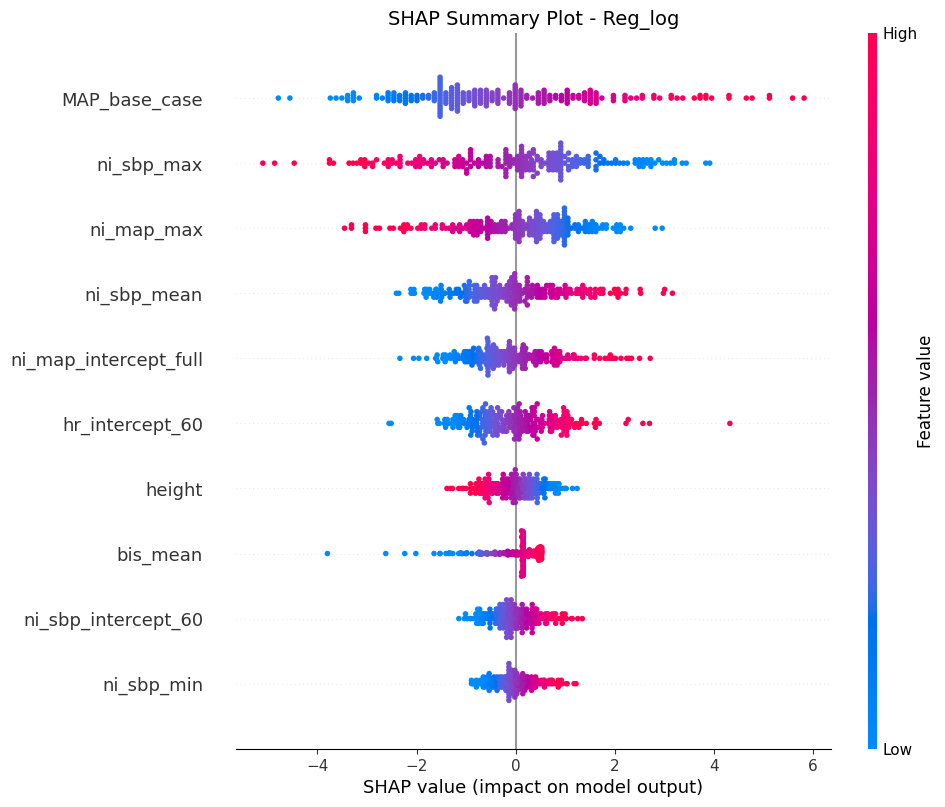

In [11]:
model_configs = [
    {
        'model_filename': 'xgb_model_opt_test.json', 
        'test_data': test,
        'train_data': train, 
        'features_names': FEATURE_NAME,
        'name': 'XGBoost_PR',
        'model_type': 'xgboost',
    },
    {
        'model_filename': 'xgb_model_opt_test_roc.json', 
        'test_data': test,
        'train_data': train, 
        'features_names': FEATURE_NAME,
        'name': 'XGBoost_ROC',
        'model_type': 'xgboost',
    },
    {
        'model_filename': 'logreg_model_opt.pkl', 
        'test_data': test,
        'train_data': train, 
        'features_names': FEATURE_NAME,
        'name': 'Reg_log',
        'model_type': 'logistic',
    },
    ]

# Initialize and run
evaluator = Test_Model(
    model_configs=model_configs,
    output_name="test")

evaluator.run()